In [46]:
import pandas as pd
import numpy as np


df = pd.read_csv('res/ObesityDataSet_raw_and_data_sinthetic.csv')


In [47]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [48]:
df['CH2O'].value_counts()

CH2O
2.000000    448
1.000000    211
3.000000    162
1.636326      3
2.825629      3
           ... 
2.722276      1
2.634342      1
2.619390      1
2.786780      1
2.863513      1
Name: count, Length: 1268, dtype: int64

In [49]:
df['FCVC'].value_counts()

FCVC
3.000000    652
2.000000    600
1.000000     33
2.971574      2
2.630137      2
           ... 
2.886260      1
2.658112      1
2.027574      1
1.123939      1
2.591439      1
Name: count, Length: 810, dtype: int64

In [50]:
df['NCP'].value_counts()


NCP
3.000000    1203
1.000000     199
4.000000      69
2.776840       2
2.644692       2
            ... 
2.142328       1
1.437959       1
1.343117       1
1.213431       1
2.014671       1
Name: count, Length: 635, dtype: int64

In [51]:
df['FAF'].value_counts()

FAF
0.000000    411
1.000000    234
2.000000    183
3.000000     75
1.228136      2
           ... 
1.412357      1
0.300964      1
0.115369      1
0.043101      1
0.246831      1
Name: count, Length: 1190, dtype: int64

In [52]:
df['TUE'].value_counts()

TUE
0.000000    557
1.000000    292
2.000000    109
0.630866      4
1.119877      3
           ... 
0.091711      1
0.178301      1
0.171034      1
0.097760      1
0.813235      1
Name: count, Length: 1129, dtype: int64

#### Como es un dataset que ha sido ampliado utlizando SMOTE tenemos que hacer varios arreglos importantes en el propio dataset

In [53]:
# Trimeamos de la columna Age los decimales cortando todos los decimales y convierto a int

df['Age'] = df['Age'].apply(lambda x: str(x).split('.')[0])

df['Age']

0       21
1       21
2       23
3       27
4       22
        ..
2106    20
2107    21
2108    22
2109    24
2110    23
Name: Age, Length: 2111, dtype: object

In [54]:
# En Height cortamos y dejamos solo dos decimales
df['Height'] = np.floor(df['Height'] * 100) / 100
df['Height'] 


0       1.62
1       1.52
2       1.80
3       1.80
4       1.78
        ... 
2106    1.71
2107    1.74
2108    1.75
2109    1.73
2110    1.73
Name: Height, Length: 2111, dtype: float64

In [55]:
# En Weight cortamos y dejamos solo un decimal
df['Weight'] = np.floor(df['Weight'] * 10) / 10
df['Weight']

0        64.0
1        56.0
2        77.0
3        87.0
4        89.8
        ...  
2106    131.4
2107    133.7
2108    133.6
2109    133.3
2110    133.4
Name: Weight, Length: 2111, dtype: float64

In [56]:
# Para la variable FCVC que son numeros del 1 al 3 aproximamos si esta por encima de x.50 hacia arriba y sino hacia abajo
def round_to_nearest_limited(x, min_val=1, max_val=3):
    rounded = round(x)
    return max(min_val, min(max_val, rounded))

df['FCVC'] = df['FCVC'].apply(lambda x: round_to_nearest_limited(x, min_val=1, max_val=3))
df['FCVC'].value_counts()

FCVC
2    1013
3     996
1     102
Name: count, dtype: int64

In [57]:
# Para la variable NCP que son numeros del 1 al 4 

df['NCP'] = df['NCP'].apply(lambda x: round_to_nearest_limited(x, min_val=1, max_val=4))
df['NCP'].value_counts()

NCP
3    1470
1     316
2     176
4     149
Name: count, dtype: int64

In [58]:
df['CH2O'] = df['CH2O'].apply(lambda x: round_to_nearest_limited(x, min_val=1, max_val=3))
df['CH2O'].value_counts()

CH2O
2    1110
3     516
1     485
Name: count, dtype: int64

In [59]:
df['FAF'] = df['FAF'].apply(lambda x: round_to_nearest_limited(x, min_val=0, max_val=3))
df['FAF'].value_counts()

FAF
1    776
0    720
2    496
3    119
Name: count, dtype: int64

In [60]:
df['TUE'] = df['TUE'].apply(lambda x: round_to_nearest_limited(x, min_val=0, max_val=2))
df['TUE'].value_counts()

TUE
0    952
1    915
2    244
Name: count, dtype: int64

### Reconvierto las variables de texto a númericas  

In [61]:
#Gender male = 0 -> Female = 1
df['Gender'] = df['Gender'].replace({'Male' : 1,'Female' : 0})
df['Gender']

C:\Users\dbp24\AppData\Local\Temp\ipykernel_7828\943998527.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male' : 1,'Female' : 0})


0       0
1       0
2       1
3       1
4       1
       ..
2106    0
2107    0
2108    0
2109    0
2110    0
Name: Gender, Length: 2111, dtype: int64

In [62]:
#family_history_with_overweight yes = 1 -> no = 0
df['family_history_with_overweight'] = df['family_history_with_overweight'].replace({'yes' : 1,'no' : 0})
df['family_history_with_overweight']

C:\Users\dbp24\AppData\Local\Temp\ipykernel_7828\1879364129.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['family_history_with_overweight'] = df['family_history_with_overweight'].replace({'yes' : 1,'no' : 0})


0       1
1       1
2       1
3       0
4       0
       ..
2106    1
2107    1
2108    1
2109    1
2110    1
Name: family_history_with_overweight, Length: 2111, dtype: int64

In [63]:
#FAVC yes = 1 -> no = 0
df['FAVC'] = df['FAVC'].replace({'yes' : 1,'no' : 0})
df['FAVC']

C:\Users\dbp24\AppData\Local\Temp\ipykernel_7828\1096812625.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FAVC'] = df['FAVC'].replace({'yes' : 1,'no' : 0})


0       0
1       0
2       0
3       0
4       0
       ..
2106    1
2107    1
2108    1
2109    1
2110    1
Name: FAVC, Length: 2111, dtype: int64

In [64]:
#CAEC no = 0 -> sometimes = 1 -> frequently = 2 -> always = 3
df['CAEC'] = df['CAEC'].replace({'no' : 0,'Sometimes' : 1,'Frequently' : 2,'Always' : 3})
df['CAEC'].value_counts()

C:\Users\dbp24\AppData\Local\Temp\ipykernel_7828\2679844508.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CAEC'] = df['CAEC'].replace({'no' : 0,'Sometimes' : 1,'Frequently' : 2,'Always' : 3})


CAEC
1    1765
2     242
3      53
0      51
Name: count, dtype: int64

In [65]:
df['SMOKE'].value_counts()

SMOKE
no     2067
yes      44
Name: count, dtype: int64

In [66]:
#SMOKE yes = 1 -> no = 0
df['SMOKE'] = df['SMOKE'].replace({'yes' : 1,'no' : 0})
df['SMOKE'].value_counts()

C:\Users\dbp24\AppData\Local\Temp\ipykernel_7828\1557151229.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SMOKE'] = df['SMOKE'].replace({'yes' : 1,'no' : 0})


SMOKE
0    2067
1      44
Name: count, dtype: int64

In [67]:
#SCC yes = 1 -> no = 0
df['SCC'] = df['SCC'].replace({'yes' : 1,'no' : 0})
df['SCC'].value_counts()

C:\Users\dbp24\AppData\Local\Temp\ipykernel_7828\2874174747.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SCC'] = df['SCC'].replace({'yes' : 1,'no' : 0})


SCC
0    2015
1      96
Name: count, dtype: int64

In [68]:
#CALC no = 0 -> sometimes = 1 -> frequently = 2 -> always = 3
df['CALC'] = df['CALC'].replace({'no' : 0,'Sometimes' : 1,'Frequently' : 2,'Always' : 3})
df['CALC'].value_counts()

C:\Users\dbp24\AppData\Local\Temp\ipykernel_7828\551567936.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CALC'] = df['CALC'].replace({'no' : 0,'Sometimes' : 1,'Frequently' : 2,'Always' : 3})


CALC
1    1401
0     639
2      70
3       1
Name: count, dtype: int64

In [69]:
#MTRANS walking = 0 -> bicycle = 1 -> motorbike = 2 -> public transport = 3 -> car = 4
df['MTRANS'] = df['MTRANS'].replace({'Walking' : 0,'Bike' : 1,'Motorbike' : 2,'Public_Transportation' : 3,'Automobile' : 4})
df['MTRANS'].value_counts()

C:\Users\dbp24\AppData\Local\Temp\ipykernel_7828\789446760.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['MTRANS'] = df['MTRANS'].replace({'Walking' : 0,'Bike' : 1,'Motorbike' : 2,'Public_Transportation' : 3,'Automobile' : 4})


MTRANS
3    1580
4     457
0      56
2      11
1       7
Name: count, dtype: int64

In [70]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

### Nos Guardamos los cambios para poder interpretarlo
    0 = Insufficient_Weight
    1 = Normal_Weight
    2 = Overweight_Level_I
    3 = Overweight_Level_II
    4 = Obesity_Type_I
    5 = Obesity_Type_II
    6 = Obesity_Type_III
   

In [71]:
#NObeyesdad Insufficient weight = 0 -> Normal weight = 1 -> Overweight Level I = 2 -> Overweight Level II = 3 -> Obesity Type I = 4 -> Obesity Type II = 5 -> Obesity Type III = 6
df['NObeyesdad'] = df['NObeyesdad'].replace({'Insufficient_Weight' : 0,'Normal_Weight' : 1,'Overweight_Level_I' : 2,'Overweight_Level_II' : 3,'Obesity_Type_I' : 4,'Obesity_Type_II' : 5,'Obesity_Type_III' : 6})
df['NObeyesdad'].value_counts()

C:\Users\dbp24\AppData\Local\Temp\ipykernel_7828\2923801582.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['NObeyesdad'] = df['NObeyesdad'].replace({'Insufficient_Weight' : 0,'Normal_Weight' : 1,'Overweight_Level_I' : 2,'Overweight_Level_II' : 3,'Obesity_Type_I' : 4,'Obesity_Type_II' : 5,'Obesity_Type_III' : 6})


NObeyesdad
4    351
6    324
5    297
2    290
3    290
1    287
0    272
Name: count, dtype: int64

| Código Original | Nombre Interpretado             |
|-----------------|---------------------------------|
| FAVC            | High_Caloric_Intake            |
| FCVC            | Vegetables_Intake              |
| NCP             | Daily_Main_Meals               |
| CAEC            | Food_Between_Meals             |
| CH2O            | Daily_Water_Consumption        |
| SCC             | Calories_Monitored             |
| FAF             | Physical_Activity              |
| TUE             | HowMuch_Time_Tech_Devices      |
| CALC            | Alcohol_Consumption            |
| SMOKE           | Smoker                         |
| MTRANS          | Transport_Method               |

In [72]:
# Vamos a renombar las columnas para que sea más interpretable

df = df.rename(columns={
    'FAVC': 'High_Caloric_Intake',
    'FCVC': 'Vegetables_Intake',
    'NCP': 'Daily_Main_Meals',
    'CAEC': 'Food_Between_Meals',
    'CH2O': 'Daily_Water_Consumption',
    'SCC': 'Calories_Monitored',
    'FAF': 'Physical_Activity',
    'TUE': 'HowMuch_Time_Tech_Devices',
    'CALC': 'Alcohol_Consumption',
    'SMOKE': 'Smoker',
    'MTRANS': 'Transport_Method',
    'family_history_with_overweight': 'Family_History_Overweight',
})
df.head()



,Gender,Age,Height,Weight,Family_History_Overweight,High_Caloric_Intake,Vegetables_Intake,Daily_Main_Meals,Food_Between_Meals,Smoker,Daily_Water_Consumption,Calories_Monitored,Physical_Activity,HowMuch_Time_Tech_Devices,Alcohol_Consumption,Transport_Method,NObeyesdad
0,0,21,1.62,64.0,1,0,2,3,1,0,2,0,0,1,0,3,1
1,0,21,1.52,56.0,1,0,3,3,1,1,3,1,3,0,1,3,1
2,1,23,1.80,77.0,1,0,2,3,1,0,2,0,2,1,2,3,1
3,1,27,1.80,87.0,0,0,3,3,1,0,2,0,2,0,2,0,2
4,1,22,1.78,89.8,0,0,2,1,1,0,2,0,0,0,1,3,3


### Guardamos el dataset limpio para poder utilizarlo en el futuro

In [73]:
df.to_csv('res/ObesityDataSet_Clean_WithAllColumns.csv', index=False)

#### Transformación de la columna `Transport_Method`

La columna `Transport_Method` indica el medio de transporte habitual de una persona. Para simplificarla e interpretar si una persona realiza actividad física durante sus desplazamientos, se propone agruparla en una variable binaria:

- Si la persona **camina** o **usa bicicleta**, se considera que **realiza actividad física** → valor `1`.
- Si usa **moto**, **coche** o **transporte público**, se considera que **no realiza actividad física** → valor `0`.

Esta transformación permite incorporar esta variable como un indicador de estilo de vida activo o sedentario.

In [74]:
# Crear nueva variable binaria basada en el tipo de transporte
df['Transport_Method'] = df['Transport_Method'].replace({
    0: 1,
    1: 1,
    2: 0,
    3: 0,
    4 : 0
})
df['Transport_Method'].value_counts()


Transport_Method
0    2048
1      63
Name: count, dtype: int64

#### Consideramos que la columna de si contabilizas tu ingesta de calorías no aporta mucha información aparte de que es una columna muy desbalanceada 

In [75]:
df['Calories_Monitored'].value_counts()

Calories_Monitored
0    2015
1      96
Name: count, dtype: int64

In [76]:
# Eliminar la columna 'Calories_Monitored'
df = df.drop(columns=['Calories_Monitored'])

#### Sabiendo que el Nivel de Obesidad está calculado utilizando el IMC como muestra el Paper : https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub#fd1

#### Vamos a hacer una bifurcación del dataset uno en el que guardamos all y otro en el que quitamos altura y peso 

In [77]:
# Guardamos un dataset sin altura y peso y otro con altura y peso
df_Height_Weight = df.copy()
df_Height_Weight = df_Height_Weight.drop(['Height', 'Weight'], axis=1)
df_Height_Weight.to_csv('res/ObesityDataSet_Clean_Without_HeightWeight.csv', index=False)


# Definición y justificación del proyecto de minería de datos
#### Alejandro Lana y Daniel Berzal
Este proyecto tiene como objetivo analizar un conjunto de datos relacionado con características físicas, hábitos alimenticios y deportivos de personas, con el fin de detectar patrones que puedan estar asociados a condiciones como la obesidad. Se aplican técnicas de clasificación, regresión y clusterización para predecir el peso, clasificar el tipo de condición física y agrupar personas según similitudes en sus hábitos.

La justificación del proyecto es la necesidad de extraer información útil de los datos para tomar decisiones informadas en temas de salud pública, prevención y tratamiento. Mediante el uso de modelos de aprendizaje automático, es posible automatizar la identificación de perfiles de riesgo y ofrecer análisis más precisos que los métodos tradicionales.


In [78]:
import pandas as pd
import numpy as np


df = pd.read_csv('res/ObesityDataSet_Clean_Without_HeightWeight.csv')
df_Full = pd.read_csv('res/ObesityDataSet_Clean_WithAllColumns.csv')
df_Full.head()


,Gender,Age,Height,Weight,Family_History_Overweight,High_Caloric_Intake,Vegetables_Intake,Daily_Main_Meals,Food_Between_Meals,Smoker,Daily_Water_Consumption,Calories_Monitored,Physical_Activity,HowMuch_Time_Tech_Devices,Alcohol_Consumption,Transport_Method,NObeyesdad
0,0,21,1.62,64.0,1,0,2,3,1,0,2,0,0,1,0,3,1
1,0,21,1.52,56.0,1,0,3,3,1,1,3,1,3,0,1,3,1
2,1,23,1.80,77.0,1,0,2,3,1,0,2,0,2,1,2,3,1
3,1,27,1.80,87.0,0,0,3,3,1,0,2,0,2,0,2,0,2
4,1,22,1.78,89.8,0,0,2,1,1,0,2,0,0,0,1,3,3


## Visualización de los datos

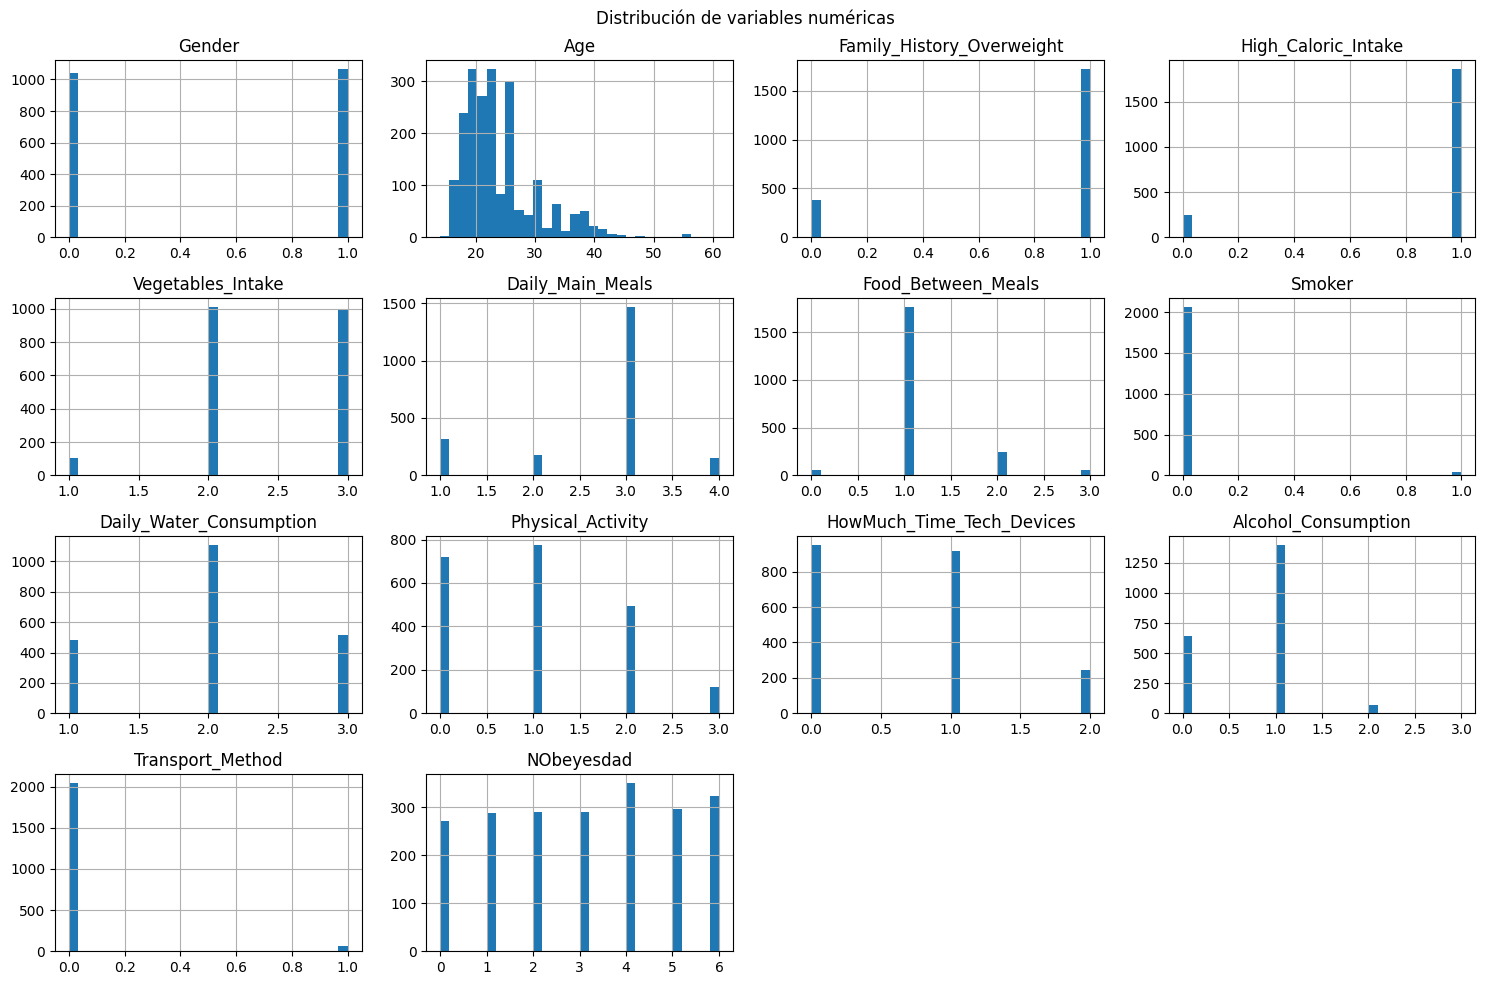

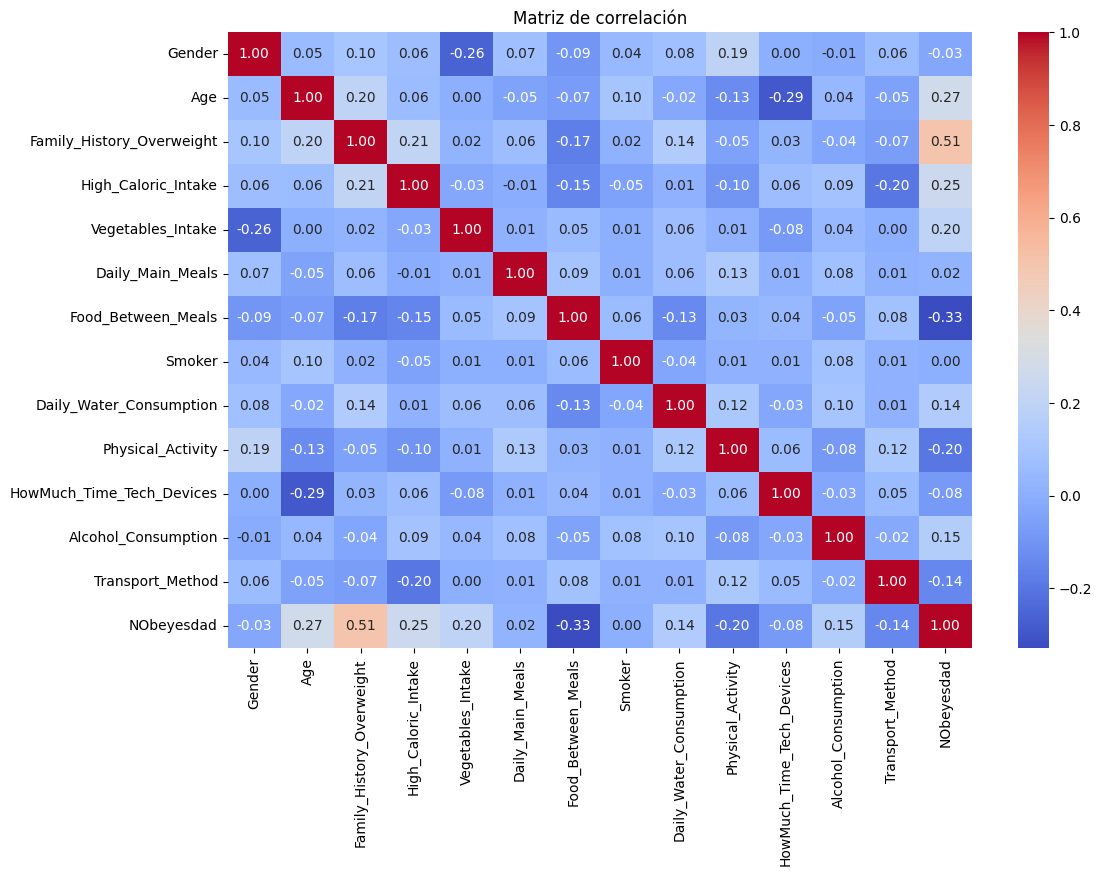

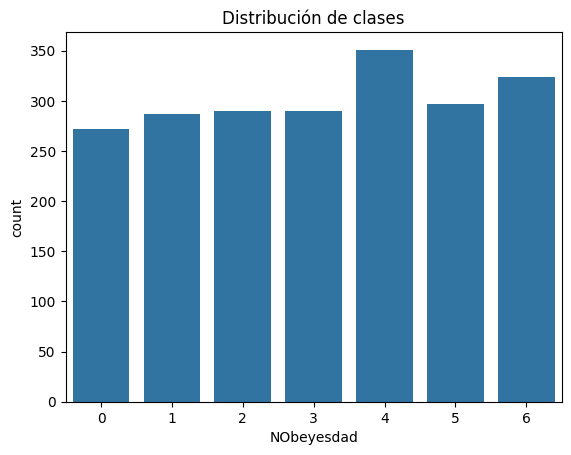

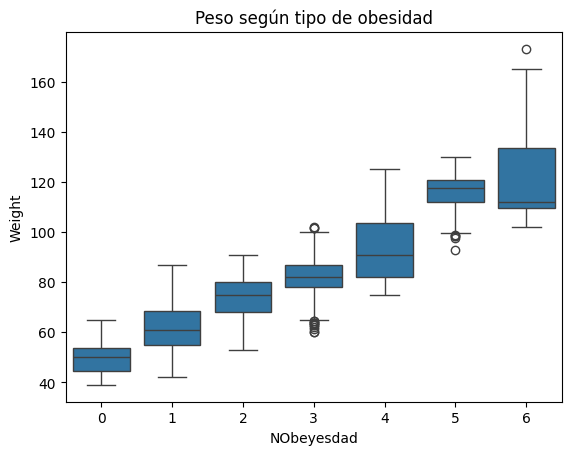

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de las variables numéricas
df.hist(bins=30, figsize=(15,10))
plt.suptitle("Distribución de variables numéricas")
plt.tight_layout()
plt.show()

# Mapa de calor de correlación
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# Conteo de clases objetivo (si hay)
sns.countplot(data=df, x='NObeyesdad')  
plt.title("Distribución de clases")
plt.show()

# Boxplots para ver relación entre variables numéricas y la clase
sns.boxplot(data=df_Full, x='NObeyesdad', y='Weight')  
plt.title("Peso según tipo de obesidad")
plt.show()


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

# Dividir el dataset en train y test
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Vars to normalize
varsToNormalize = ['Age','Physical_Activity','HowMuch_Time_Tech_Devices','Daily_Water_Consumption','Vegetables_Intake','Daily_Main_Meals']
# Normalizar las variables
scaler = StandardScaler()
X_train[varsToNormalize] = scaler.fit_transform(X_train[varsToNormalize])
X_test[varsToNormalize] = scaler.transform(X_test[varsToNormalize])

# Crear el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=3)
# Entrenar el clasificador
knn.fit(X_train, y_train)
# Predecir en el conjunto de test
y_pred = knn.predict(X_test)
#Printeamos la matriz de confusión el accuracy y el balanced accuracy
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[60  5  6  5  4  1  5]
 [20 29 14  7 12  8  3]
 [ 8  9 49  4  8  8  2]
 [ 6  8  7 31 17  8  2]
 [ 5  8  8 10 63  7  1]
 [ 7  0  1  2  3 75  0]
 [ 0  1  1  0  0  0 96]]
              precision    recall  f1-score   support

           0       0.57      0.70      0.62        86
           1       0.48      0.31      0.38        93
           2       0.57      0.56      0.56        88
           3       0.53      0.39      0.45        79
           4       0.59      0.62      0.60       102
           5       0.70      0.85      0.77        88
           6       0.88      0.98      0.93        98

    accuracy                           0.64       634
   macro avg       0.62      0.63      0.62       634
weighted avg       0.62      0.64      0.62       634



In [81]:
#hacemos lo mismo pero con el dataset que tiene todas las columnas
X_full = df_Full.drop('NObeyesdad', axis=1)
y_full = df_Full['NObeyesdad']
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.3, random_state=42)
# Normalizar las variables
scaler_full = StandardScaler()
X_train_full[varsToNormalize] = scaler_full.fit_transform(X_train_full[varsToNormalize])
X_test_full[varsToNormalize] = scaler_full.transform(X_test_full[varsToNormalize])
# Crear el clasificador KNN
knn_full = KNeighborsClassifier(n_neighbors=3)
# Entrenar el clasificador
knn_full.fit(X_train_full, y_train_full)
# Predecir en el conjunto de test
y_pred_full = knn_full.predict(X_test_full)
#Printeamos la matriz de confusión el accuracy y el balanced accuracy
print(confusion_matrix(y_test_full, y_pred_full))
print(classification_report(y_test_full, y_pred_full))
#Hacemos balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test_full, y_pred_full)
print(f'Balanced Accuracy: {balanced_accuracy}')


[[83  3  0  0  0  0  0]
 [22 47 17  6  1  0  0]
 [ 1  7 76  4  0  0  0]
 [ 0  6  4 60  7  2  0]
 [ 0  0  4  2 93  2  1]
 [ 0  0  0  0  0 88  0]
 [ 0  0  0  0  0  0 98]]
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        86
           1       0.75      0.51      0.60        93
           2       0.75      0.86      0.80        88
           3       0.83      0.76      0.79        79
           4       0.92      0.91      0.92       102
           5       0.96      1.00      0.98        88
           6       0.99      1.00      0.99        98

    accuracy                           0.86       634
   macro avg       0.85      0.86      0.85       634
weighted avg       0.86      0.86      0.85       634

Balanced Accuracy: 0.8579124805086545


C:\Users\dbp24\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\dbp24\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^

# Vamos a graficar con un heatmap los resultados de los 6 tipos de Nobeyesdad

Se utiliza un heatmap para visualizar de forma clara y rápida la distribución de los 6 tipos de Nobeyesdad, permitiendo identificar patrones o concentraciones en los datos.

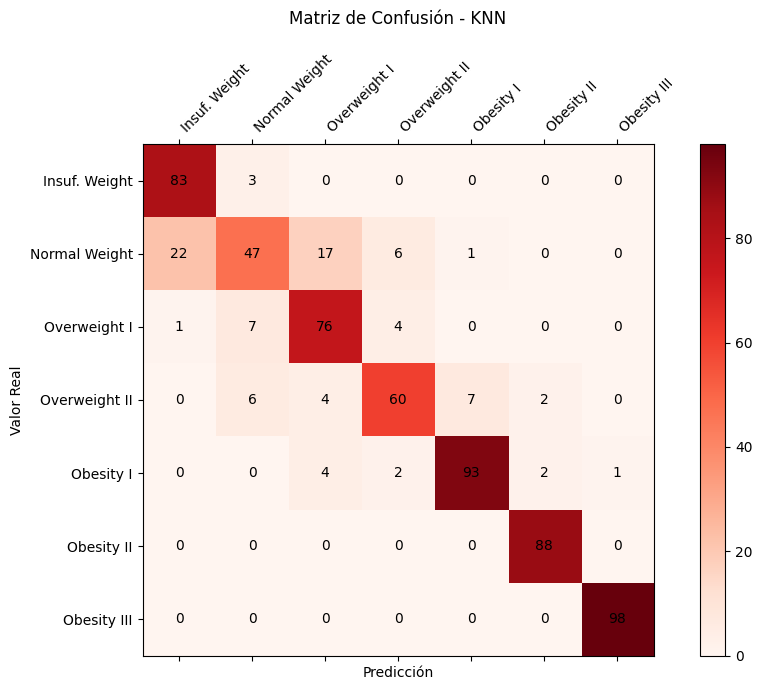

In [82]:
import matplotlib.pyplot as plt

# Recalculamos la matriz de confusión
cm = confusion_matrix(y_test_full, y_pred_full)

labels = [
    'Insuf. Weight', 'Normal Weight', 'Overweight I',
    'Overweight II', 'Obesity I', 'Obesity II', 'Obesity III'
]

fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.matshow(cm, cmap=plt.cm.Reds)

fig.colorbar(cax)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='left')
ax.set_yticklabels(labels)

# Etiquetas
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - KNN', pad=20)

for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()


# Ahora vamos a hacer arboles de decisión

Se aplican árboles de decisión porque permiten clasificar de forma interpretable y eficiente, ayudando a entender qué variables influyen más en la clasificación.

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#Recargamos el dataset
df = pd.read_csv('res/ObesityDataSet_Clean_WithAllColumns.csv')


In [84]:
# Dividir el dataset en train y test
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Crear el clasificador de árboles de decisión
tree = DecisionTreeClassifier(random_state=42)
# Entrenar el clasificador
tree.fit(X_train, y_train)
# Predecir en el conjunto de test
y_pred_tree = tree.predict(X_test)
#Printeamos la matriz de confusión el accuracy y el balanced accuracy
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
#Hacemos balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_tree)
print(f'Balanced Accuracy: {balanced_accuracy}')


[[82  4  0  0  0  0  0]
 [ 8 78  7  0  0  0  0]
 [ 0  8 77  3  0  0  0]
 [ 0  0  5 74  0  0  0]
 [ 0  1  0  3 93  5  0]
 [ 0  0  0  0  2 86  0]
 [ 0  0  0  0  1  0 97]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        86
           1       0.86      0.84      0.85        93
           2       0.87      0.88      0.87        88
           3       0.93      0.94      0.93        79
           4       0.97      0.91      0.94       102
           5       0.95      0.98      0.96        88
           6       1.00      0.99      0.99        98

    accuracy                           0.93       634
   macro avg       0.92      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634

Balanced Accuracy: 0.9261057516848998


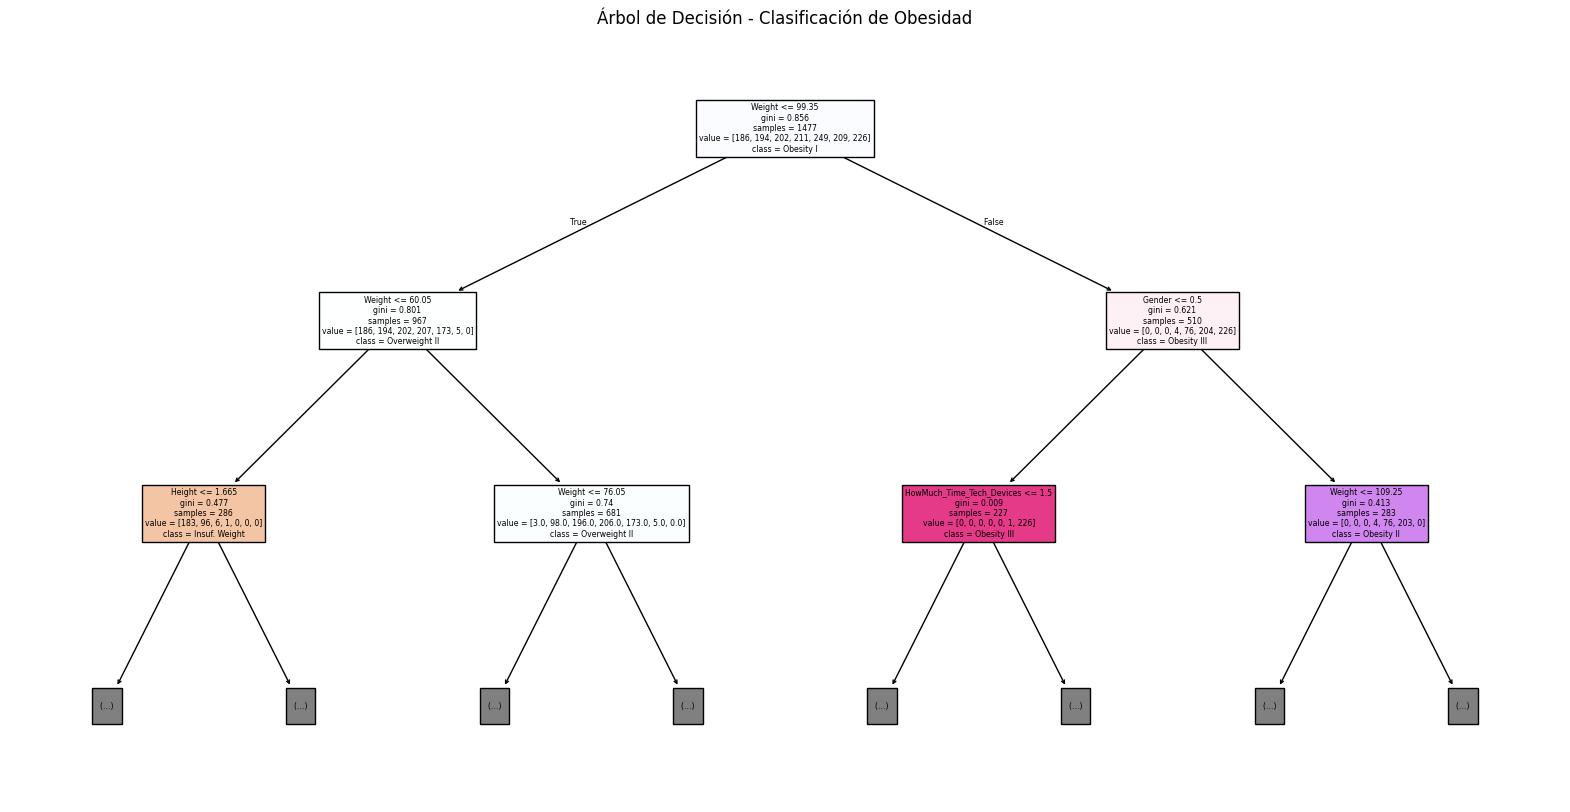

In [85]:
#Ploteamos el arbol

class_names = [
    'Insuf. Weight', 'Normal Weight', 'Overweight I',
    'Overweight II', 'Obesity I', 'Obesity II', 'Obesity III'
]


plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=class_names, filled=True ,max_depth=2)
plt.title('Árbol de Decisión - Clasificación de Obesidad')
plt.show()

# Check de overfitting

Se verifica el overfitting para asegurarse de que el modelo generaliza bien a datos nuevos y no está memorizando el conjunto de entrenamiento.

In [86]:
# Predicciones sobre entrenamiento
y_train_pred = tree.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

# Predicciones sobre test
y_test_pred = tree.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f'Accuracy en entrenamiento: {train_acc:.2f}')
print(f'Accuracy en test: {test_acc:.2f}')


Accuracy en entrenamiento: 1.00
Accuracy en test: 0.93


### Vamos a Hacer análisis de Regresión lineal para predecir el peso

Se emplea regresión lineal para predecir el peso a partir de otras variables, facilitando entender la relación entre factores y peso.

Error cuadrático medio: 29.95
R^2: 0.96


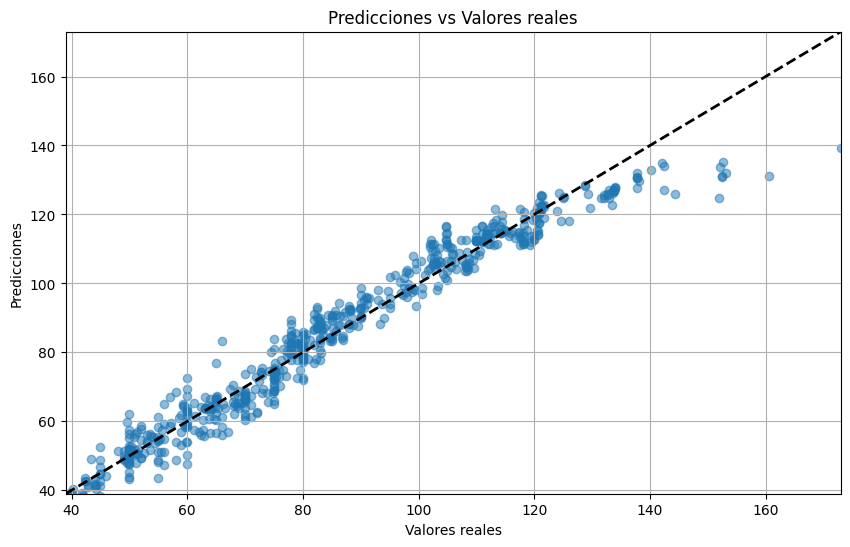

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dividir el dataset en train y test
X = df.drop('Weight', axis=1)
y = df['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Normalizar las variables
scaler = StandardScaler()
X_train[varsToNormalize] = scaler.fit_transform(X_train[varsToNormalize])
X_test[varsToNormalize] = scaler.transform(X_test[varsToNormalize])
# Crear el modelo de regresión lineal
model = LinearRegression()
# Entrenar el modelo
model.fit(X_train, y_train)
# Predecir en el conjunto de test
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio y el R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error cuadrático medio: {mse:.2f}')
print(f'R^2: {r2:.2f}')

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.grid()
plt.show()




## Vamos a hacer clasificación con K-means para clasificar personas por sus habitos deportivos o alimenticios

Se usa K-means para agrupar a las personas según sus hábitos, lo que ayuda a segmentar la población sin necesidad de etiquetas previas.

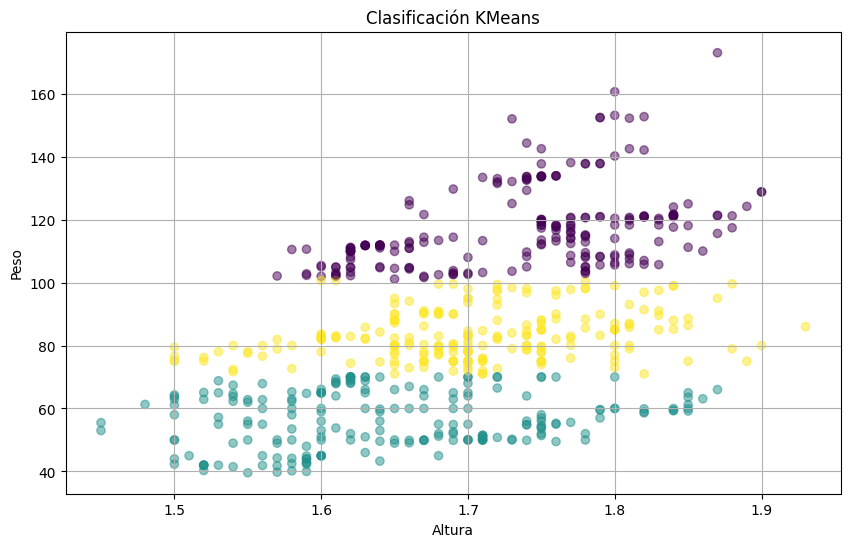

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargamos el dataset
df = pd.read_csv('res/ObesityDataSet_Clean_WithAllColumns.csv')
#Separamos en entrenamiento y test
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
# Dividir el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Normalizar las variables
scaler = StandardScaler()
X_train[varsToNormalize] = scaler.fit_transform(X_train[varsToNormalize])
X_test[varsToNormalize] = scaler.transform(X_test[varsToNormalize])
# Crear el modelo KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
# Entrenar el modelo
kmeans.fit(X_train)
# Predecir los clusters
y_pred = kmeans.predict(X_test)
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Height'], X_test['Weight'], c=y_pred, cmap='viridis', alpha=0.5)
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title('Clasificación KMeans')
plt.grid()
plt.show()